In [3]:

import torch
import numpy as np
import matplotlib.pyplot as plt


# import local functions
from mfpml.design_of_experiment.sf_samplers import SobolSequence
from mfpml.problems.sf_functions import Sixhump
from mfpml.problems.functions import get_class
from sklearn.metrics import r2_score, mean_squared_error, max_error

In [2]:
# define the test function 
function = Sixhump() 
num_trial = 10 
record_results_gpy = np.zeros((num_trial, 3)) 
record_results_scipy = np.zeros((num_trial, 3)) 
record_results_own = np.zeros((num_trial, 3)) 
# get the number of variables
num_dim = function.num_dim
# user-defined parameters
num_sample = 30
# define the design space
design_space = function.design_space

## kriging model

In [3]:
from mfpml.models.kriging import Kriging

In [4]:
for jj in range(num_trial):
    # sampling
    sampler = SobolSequence(design_space=design_space, seed=None)
    sample_x = sampler.get_samples(num_samples=num_sample)
    sample_y = function.f(sample_x)
    # gpr model
    gprmodel  = Kriging(design_space=function._input_domain)
    gprmodel.train(sample_x, sample_y)
    # prediction
    num_test = 1000
    test_x = sampler.get_samples(num_samples=num_test)
    test_y = function.f(test_x.copy())
    pred_mean, pred_std = gprmodel.predict(test_x, return_std=True)

    # calculate different metrics to record the accuracy of the prediction
    mse = mean_squared_error(pred_mean, test_y)
    r2 = r2_score(pred_mean, test_y)
    mae = max_error(pred_mean, test_y)

    # record the results
    record_results_own[jj, :] = np.array([mse, r2, mae])

In [5]:
print(record_results_own)

[[0.32688056 0.99987754 6.1098497 ]
 [0.98656665 0.99963054 7.33776841]
 [0.73386449 0.99971526 9.03738217]
 [0.36781781 0.99984974 4.81578641]
 [0.49565613 0.99981662 5.01515278]
 [0.05816999 0.99997694 2.272895  ]
 [0.65362562 0.99974424 4.47505025]
 [0.24987397 0.99990443 4.28922849]
 [0.41652097 0.99983823 8.01010503]
 [0.24290263 0.9999099  6.37062391]]


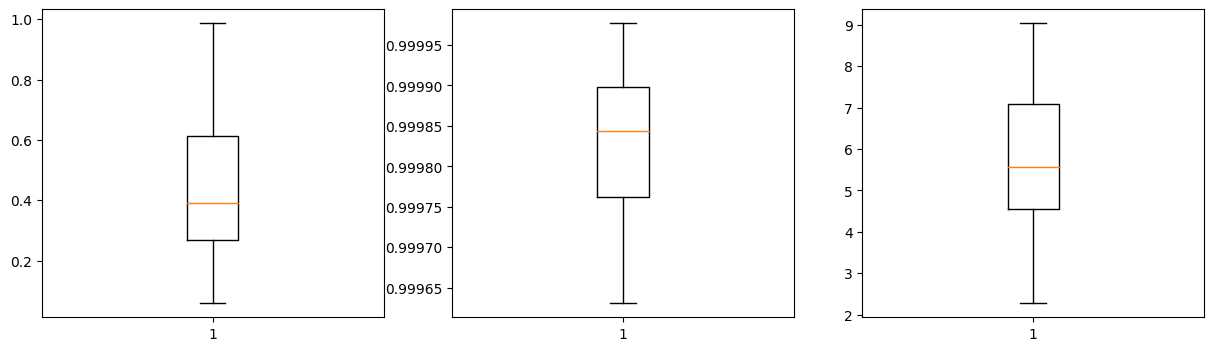

In [6]:
# plot all results 
import matplotlib.pyplot as plt 
mse = np.array([record_results_own[:,0] ]).T
r2 = np.array([record_results_own[:,1] ]).T
mae = np.array([record_results_own[:,2] ]).T
fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].boxplot(mse)
ax[1].boxplot(r2)
ax[2].boxplot(mae)
plt.show()

In [6]:
import sys
from mfpml.problems.sf_functions import Forrester


In [5]:
test = get_class("Forrester")
test.design_space

AttributeError: module 'mfpml.problems.functions' has no attribute 'Forrester'

In [2]:
fun_name = ['aa','bb'] 
num_sample =10
filename = fun_name[0] + "_" + str(num_sample) + ".pickle"
print(filename)

aa_10.pickle
